In [64]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [65]:
trained_data = ["water_dataset\impure", "water_dataset\pure"]

In [66]:
def load_images(trained_data):
    images = []
    labels = []
    for i in range(len(trained_data)):
        folder = trained_data[i]
        label = i
        for filename in os.listdir(folder):
            try:
                img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_COLOR)
                img = cv2.resize(img, (48,48))
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {os.path.join(folder, filename)}: {e}")

    return np.array(images), np.array(labels)


In [67]:
images, labels = load_images(trained_data)
images

Error loading image water_dataset\pure\photo-1518837695005-2083093ee35b.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Error loading image water_dataset\pure\photo-1530053969600-caed2596d242.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Error loading image water_dataset\pure\wallpaper-concept-flow-element-force_1172-167.jpeg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



array([[[[ 42, 121, 130],
         [ 20,  91,  91],
         [ 31, 108, 107],
         ...,
         [ 17,  82,  78],
         [ 30, 129, 114],
         [ 22, 102,  83]],

        [[ 10,  14,  24],
         [ 22,  67,  68],
         [ 14,  67,  63],
         ...,
         [ 40, 108,  94],
         [ 31, 103,  93],
         [ 49, 108, 103]],

        [[ 36,  79,  74],
         [  2,  16,  18],
         [ 44,  62,  60],
         ...,
         [ 11,  39,  28],
         [ 17,  33,  29],
         [ 47,  85,  85]],

        ...,

        [[  2,  63,  62],
         [ 29, 124, 120],
         [ 28, 111, 110],
         ...,
         [122, 141, 176],
         [108, 129, 169],
         [122, 148, 194]],

        [[ 33, 124, 123],
         [ 17,  92,  91],
         [ 36, 110, 113],
         ...,
         [143, 161, 196],
         [111, 132, 170],
         [107, 127, 165]],

        [[ 26, 111, 107],
         [ 15,  92,  84],
         [ 21, 104, 106],
         ...,
         [173, 193, 228],
        

In [68]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)


In [70]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 3).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 48, 48, 3).astype('float32')/255

In [71]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [73]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

In [74]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

model = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, verbose=1, validation_data=(X_test, y_test))


Epoch 1/10
5/5 [==============================] - 14s 713ms/step - loss: 0.6742 - accuracy: 0.5338 - val_loss: 0.6421 - val_accuracy: 0.6479
Epoch 2/10
5/5 [==============================] - 4s 796ms/step - loss: 0.5754 - accuracy: 0.7224 - val_loss: 0.6560 - val_accuracy: 0.6197
Epoch 3/10
5/5 [==============================] - 2s 399ms/step - loss: 0.5303 - accuracy: 0.7189 - val_loss: 0.7338 - val_accuracy: 0.6197
Epoch 4/10
5/5 [==============================] - 2s 425ms/step - loss: 0.4771 - accuracy: 0.7438 - val_loss: 0.6062 - val_accuracy: 0.6761
Epoch 5/10
5/5 [==============================] - 2s 249ms/step - loss: 0.4466 - accuracy: 0.7758 - val_loss: 0.5798 - val_accuracy: 0.7183
Epoch 6/10
5/5 [==============================] - 1s 222ms/step - loss: 0.4243 - accuracy: 0.8327 - val_loss: 0.8093 - val_accuracy: 0.6056
Epoch 7/10
5/5 [==============================] - 1s 295ms/step - loss: 0.4189 - accuracy: 0.8078 - val_loss: 0.5787 - val_accuracy: 0.7465
Epoch 8/10
5/5 [===

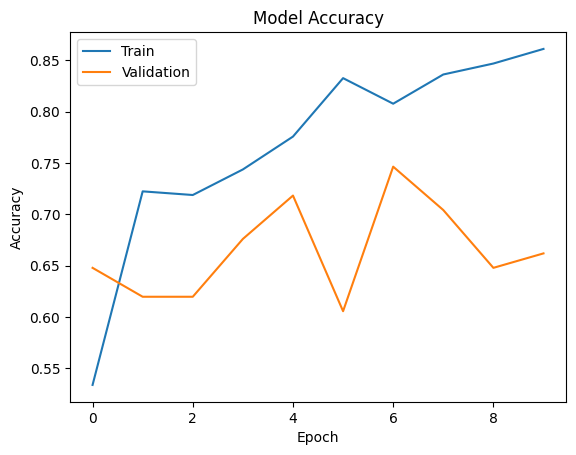

In [76]:
import matplotlib.pyplot as plt

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

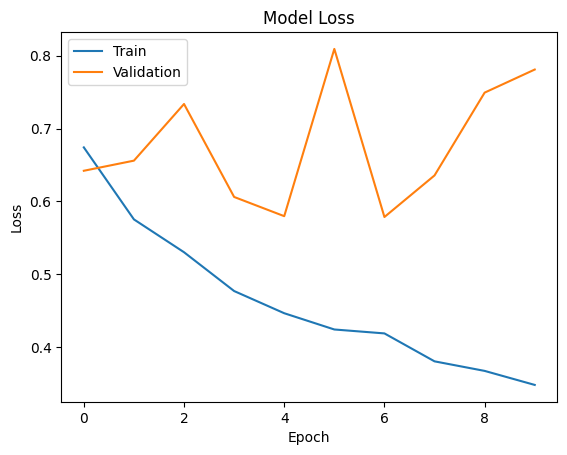

In [77]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

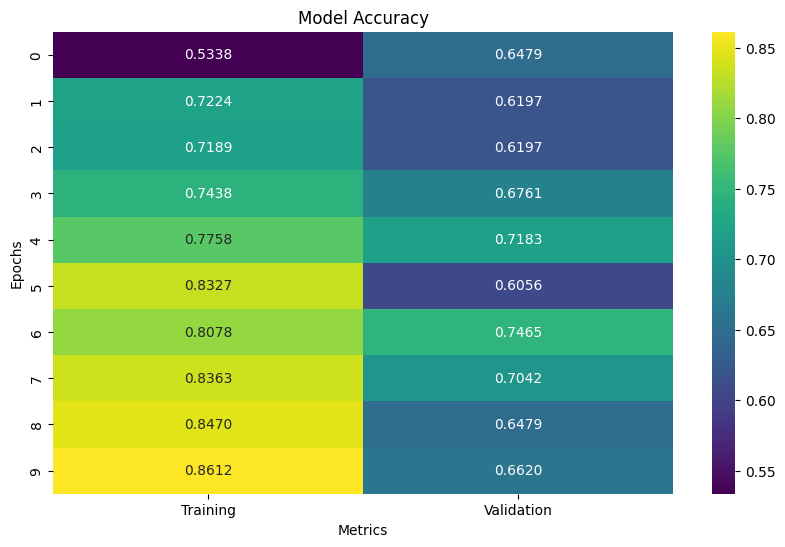

In [78]:
import seaborn as sns
import pandas as pd
history_df = pd.DataFrame(model.history)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(history_df[['accuracy', 'val_accuracy']], annot=True, fmt='.4f', cmap='viridis')
plt.title('Model Accuracy')
plt.xlabel('Metrics')
plt.ylabel('Epochs')
plt.xticks(ticks=[0.5, 1.5], labels=['Training', 'Validation'])
plt.show()